## Topic of the project:

The largest source of emissions of carbon dioxide (CO2, the most common greenhouse gas) in the majority of countries, especially developped countries,  is the transportation sector.
The CO2 emissions proportions can vary based on factors such as the vehicles fuel type, fuel economy, mileage and vehicles caracteristics.

Understanding the relationships between those features can guide decisions related to engine design, fuel efficiency improvements, and environmental impact. 
In this project, we have chosen a dataset that captures the details of how CO2 emissions by vehicles can vary with different features.

The dataset has been taken from Canada Government official open data website. It is also available in Kaggle website.
Link: https://www.kaggle.com/datasets/bhuviranga/co2-emissions


## Description of the variables used in this dataset:

The dataset includes 12 variables:


-Make : vehicle manufacturer


-Model : vehicle model


-Vehicle class : different vehicle classes, such as sedans, SUVs, trucks, or sports cars


-Engine Size (L) : size of engine


-Cylinders : engine cylinder


-Transmission : type of transmissison (automatic or manual transmission)


-Fuel Type : Type of fuel used by a vehicle


-Fuel Consumption City (L/100km) : fuel consumption of a vehicle in city


-Fuel Consumption Hwy (L/100 km) : fuel consumption of a vehicle in highway


-Fuel Consumption Comb (L/100 km) : fuel consumption of a vehicle in city and highway (combined) in unit liter per 100 kilometers.

-Fuel Consumption Comb (mpg) : fuel consumption of a vehicle in city and highway (combined) in unit miles per gallon.


-CO2 Emissions(g/km) : amount of CO2 gas emitted.

# CO2 Emissions analysis:

## 1. Importing libraries:

In [87]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import kurtosis
from scipy.stats import shapiro
from scipy.stats import pearsonr
import statsmodels
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.model_selection import train_test_split

from warnings import filterwarnings
filterwarnings('ignore')

## 2. Loading data

In [88]:

# load the dataset
data = pd.read_csv(r"C:\Users\sanas\OneDrive\Desktop\Datasets for DSC 520 & 530\CO2 Emissions.csv")

# view the first few rows
data.head()



,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


## 3. Discovering data:


In [89]:
# check the dimension of the dataset
data.shape


(7385, 12)

In [90]:
# columns names
data.columns

Index(['Make', 'Model', 'Vehicle Class', 'Engine Size(L)', 'Cylinders',
       'Transmission', 'Fuel Type', 'Fuel Consumption City (L/100 km)',
       'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
       'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)'],
      dtype='object')

In [91]:
# top overview of the data:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

Our dataset contains 7385 rows and 12 columns: 4 float columns, 3 integer columns  and 5 object columns. 

## 4. Data cleaning:

We will check if there are duplicated rows, rename certain columns and insert a new column. 

In [92]:
# check if our data contains NULL values and sum them
data.isnull().sum()

Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
dtype: int64

So, our data doesn't include any missing values.

In [93]:
# check if there are duplicated rows in the dataset.
duplicate = data.duplicated().sum()
print('There are {} duplicated rows in the data'.format(duplicate))

There are 1103 duplicated rows in the data


In [94]:
# drop the duplicates.
data.drop_duplicates(inplace=True)

In [95]:
# reset indexes.
data.reset_index(inplace=True, drop=True)

In [96]:
# rename columns:
data = data.rename(columns={
    "Vehicle Class" : "Vehicle_Class",
    'Engine Size(L)': 'Engine_Size',
    'Fuel Type': 'Fuel_Type', 
    'Fuel Consumption City (L/100 km)': 'Fuel_Consumption_City',
    'Fuel Consumption Hwy (L/100 km)': 'Fuel_Consumption_Hwy',
    'Fuel Consumption Comb (L/100 km)': 'Fuel_Consumption_Comb',
    'Fuel Consumption Comb (mpg)': 'Fuel_Consumption_Comb2',
    'CO2 Emissions(g/km)' : 'CO2_Emissions'    
})

In [97]:
# insert a new column 'Transmission_Class' - ['Automatic', 'Manual'].
data['Transmission_Class'] = data['Transmission'].apply(lambda x: 'Automatic' if x.startswith('A') else 'Manual')

In [98]:
# drop a column that I see not useful:
data.drop(['Model'],axis=1,inplace=True)

In [99]:
# replace the values in column 'Fuel Type'.
data['Fuel_Type'] = data['Fuel_Type'].replace(['X', 'Z', 'E', 'D', 'N'], ['Regular Gasoline','Premium Gasoline','Ethanol','Diesel','Natural Gas'])

In [101]:
data.head()

,Make,Vehicle_Class,Engine_Size,Cylinders,Transmission,Fuel_Type,Fuel_Consumption_City,Fuel_Consumption_Hwy,Fuel_Consumption_Comb,Fuel_Consumption_Comb2,CO2_Emissions,Transmission_Class
0,ACURA,COMPACT,2.0,4,AS5,Premium Gasoline,9.9,6.7,8.5,33,196,Automatic
1,ACURA,COMPACT,2.4,4,M6,Premium Gasoline,11.2,7.7,9.6,29,221,Manual
2,ACURA,COMPACT,1.5,4,AV7,Premium Gasoline,6.0,5.8,5.9,48,136,Automatic
3,ACURA,SUV - SMALL,3.5,6,AS6,Premium Gasoline,12.7,9.1,11.1,25,255,Automatic
4,ACURA,SUV - SMALL,3.5,6,AS6,Premium Gasoline,12.1,8.7,10.6,27,244,Automatic


## 5. Exploratory Data Analysis:

In [102]:
data.describe()

,Engine_Size,Cylinders,Fuel_Consumption_City,Fuel_Consumption_Hwy,Fuel_Consumption_Comb,Fuel_Consumption_Comb2,CO2_Emissions
count,6282.000000,6282.000000,6282.000000,6282.000000,6282.000000,6282.000000,6282.000000
mean,3.161812,5.618911,12.610220,9.070583,11.017876,27.411016,251.157752
std,1.365201,1.846250,3.553066,2.278884,2.946876,7.245318,59.290426
min,0.900000,3.000000,4.200000,4.000000,4.100000,11.000000,96.000000
25%,2.000000,4.000000,10.100000,7.500000,8.900000,22.000000,208.000000
50%,3.000000,6.000000,12.100000,8.700000,10.600000,27.000000,246.000000
75%,3.700000,6.000000,14.700000,10.300000,12.700000,32.000000,289.000000
max,8.400000,16.000000,30.600000,20.600000,26.100000,69.000000,522.000000


- The average amount of CO2 emitted from cars is 251 g/km.
- The average amount of Fuel Consumed by cars on city and Hwy is approximatly 11 L/100km.
-  The amount of fuel consumed by cars on city is comparitvely greater than that of highway.
- About 75% of the cars have 6 or less cylinders and less than 4L as engine size.
- The maximum Fuel consumed by cars on city and Hwy is about 26 L/100km.
- The maximum CO2 emitted by cars is 522 g/km.


In [103]:
data.describe(include = object)

,Make,Vehicle_Class,Transmission,Fuel_Type,Transmission_Class
count,6282,6282,6282,6282,6282
unique,42,16,27,5,2
top,FORD,SUV - SMALL,AS6,Regular Gasoline,Automatic
freq,577,1006,1139,3039,5263


- We have 42 different car companies. The most vehicle manufacturer is FORD.
- Vehicles are divided into 16 different classes with SUV-Small vehicles frequenting the most.
- There are Five different types of fuels used by cars and the fuel 'Regular Gasoline seems to be the most famous.
- Most of the cars have Automatic transmission (especially AS6 transmission).

### 5.1. Creating histograms for each variable.

Before creating histograms for each variable, I prefer displaying the number of unique values for each variable.

In [104]:
data.nunique()

Make                       42
Vehicle_Class              16
Engine_Size                51
Cylinders                   8
Transmission               27
Fuel_Type                   5
Fuel_Consumption_City     211
Fuel_Consumption_Hwy      143
Fuel_Consumption_Comb     181
Fuel_Consumption_Comb2     54
CO2_Emissions             331
Transmission_Class          2
dtype: int64

#### - categorical variables:

In [105]:
# create the data_categories object of categorical data.
data_categories= data.select_dtypes(include='object')
# create the object data_categories1 containing 'Vehicle_Class', 'Transmission', 'Transmission_Class',  'Fuel_Type' 
# and'Make' variables.
data_categories1 = data_categories[['Vehicle_Class', 'Transmission', 'Transmission_Class',  'Fuel_Type','Make']]

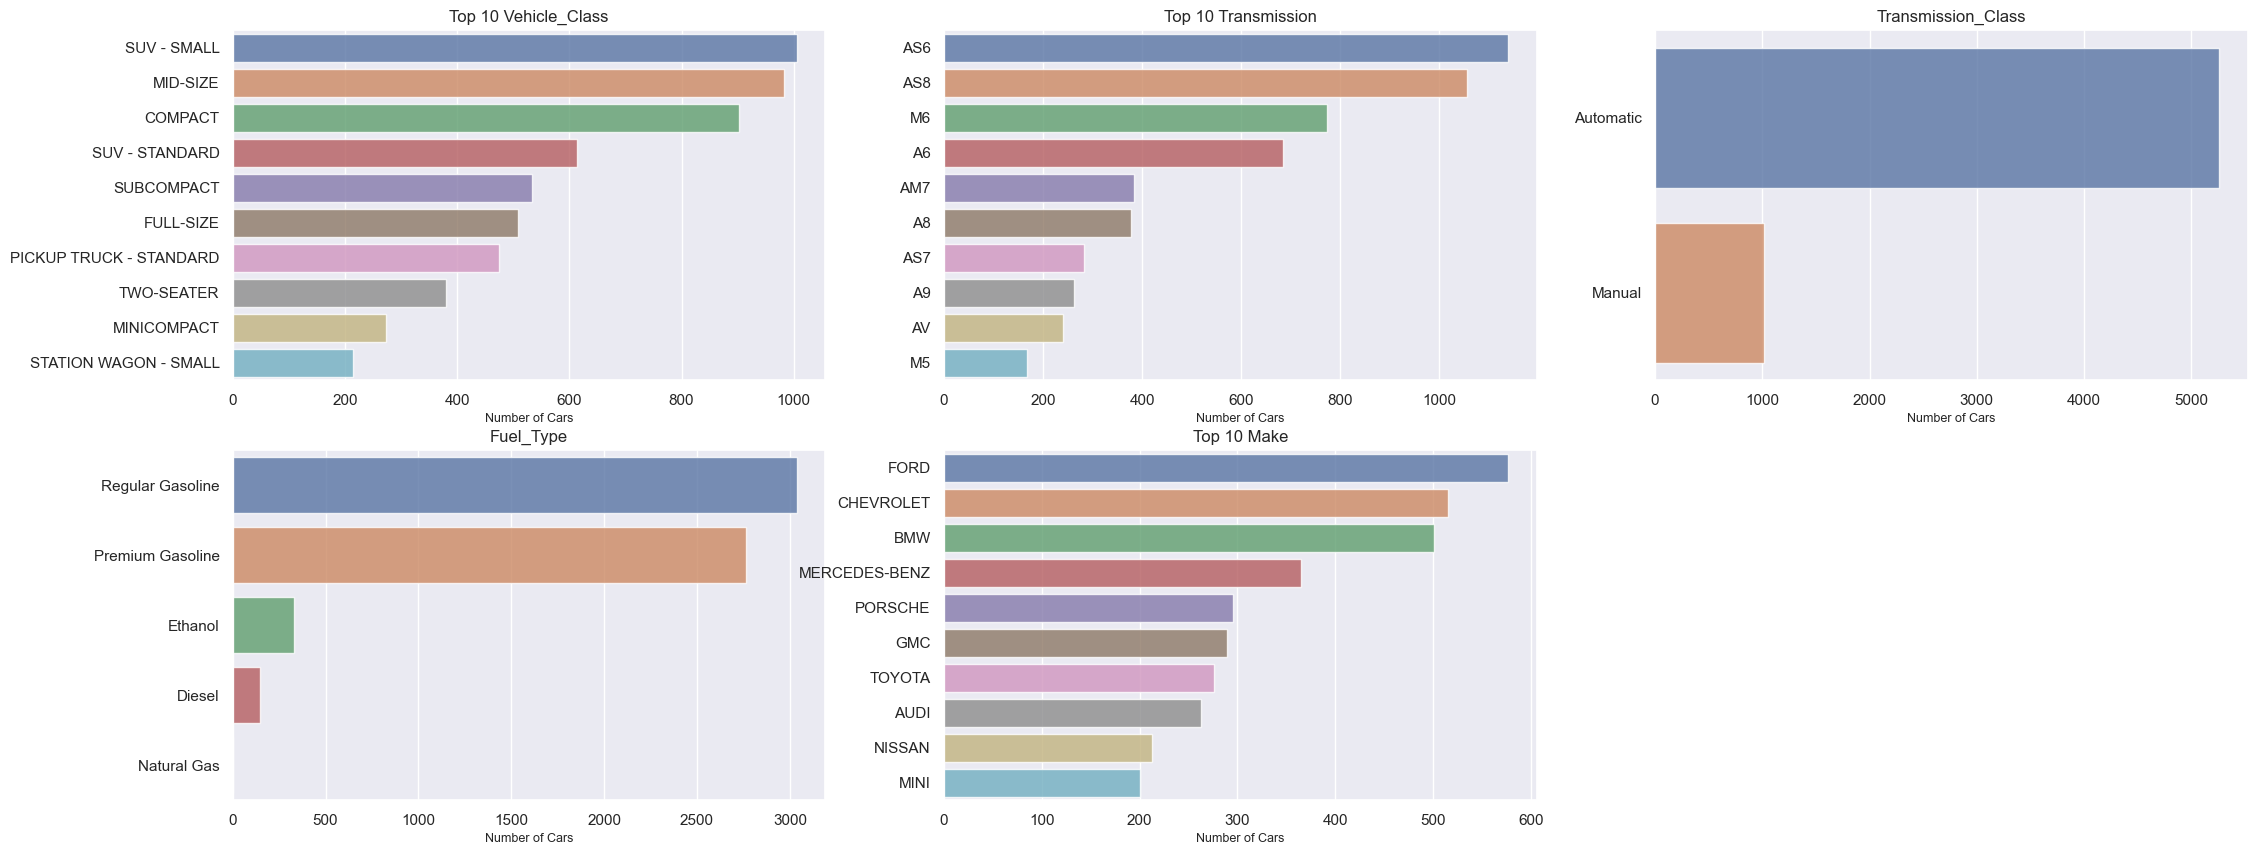

In [106]:
# plot the different categorical variables.
fig,ax= plt.subplots(nrows=2,ncols=3,figsize=(26, 10)) 

for variable, subplot in zip(data_categories1.columns,ax.flatten()):
    cat_count  = data[variable].value_counts()
    cat_count10 = cat_count[:10,]
    z = sns.barplot(x=cat_count10.values, y=cat_count10.index, ax=subplot, alpha=0.8, )
    if cat_count.size > 10:
        z.set_title('Top 10 {}'.format(variable))
    else:
        z.set_title(variable)
    z.set_xlabel('Number of Cars', fontsize=9)
fig.delaxes(ax[1][2])
plt.show()    


- Most of the cars on Canadian roads (used in the dataset) are made by Ford, CHEVROLET and BMW companies.
- SUV-Small, MID_SIZE and COMPACT are the preferred vehicles classes amongst the Canadians.
- More than 5000 cars have automatic transmission mostly AS6 and AS8 transmission types, only 1000 cars have manual transmission.
- Majority of the cars in Canada use Regular Gasoline and Premium Gasoline types of Fuel.

#### - Quantitative variables:

In [107]:
# create the data_numerical object including the quantitative data.
data_numerical = data.select_dtypes(include=np.number)

In [108]:
# Histograms for 'Engine Size' 'Cylinders', 'Fuel_Consumption_City', 'Fuel_Consumption_Hwy', 'Fuel_Consumption_Comb', 'Fuel_Consumption_Comb2','CO2 Emissions':

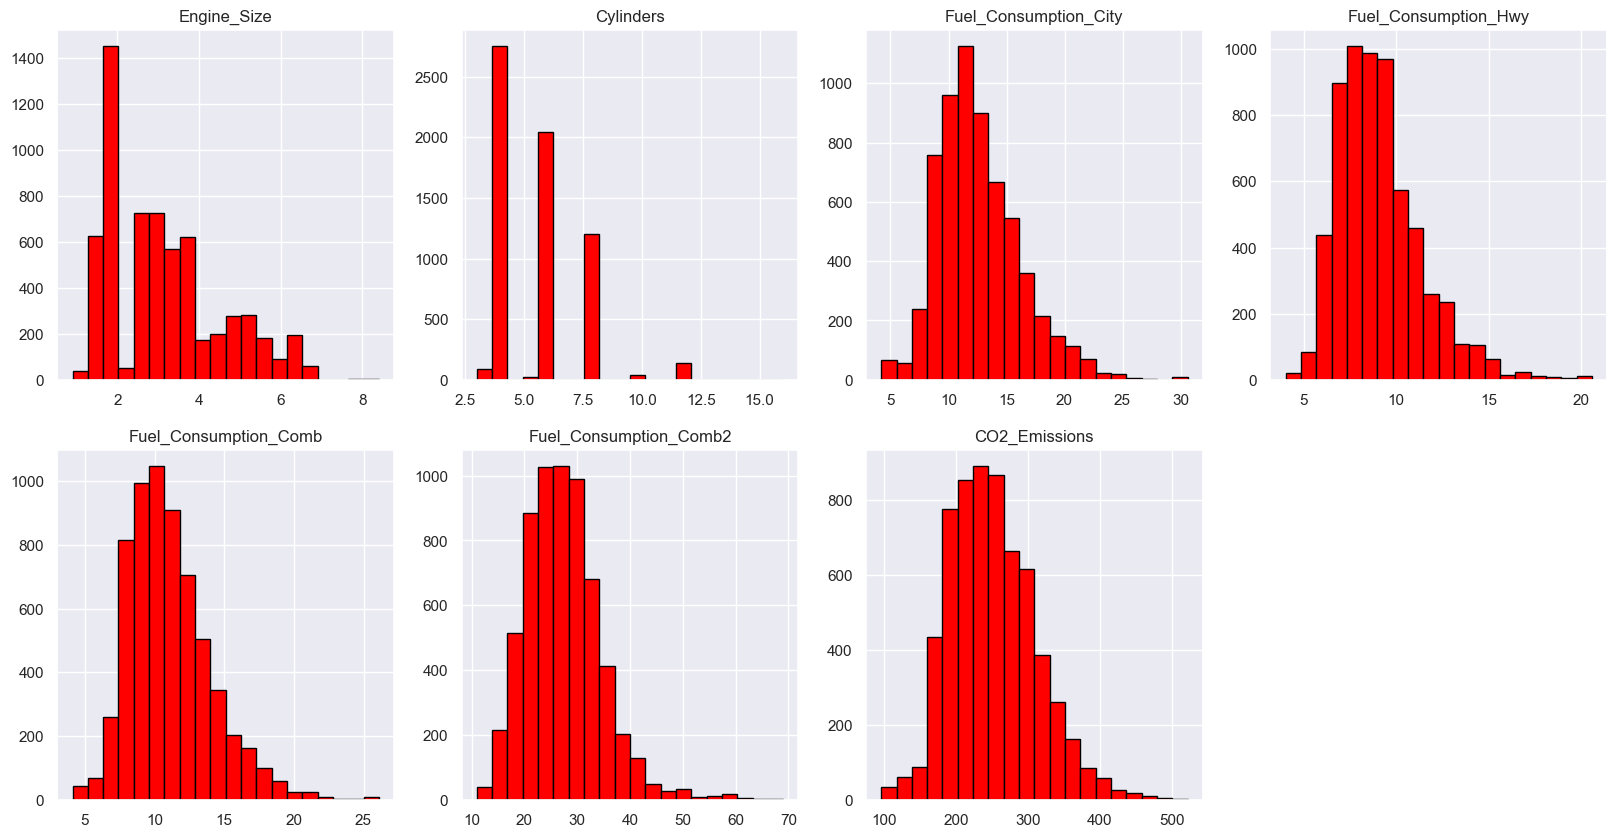

In [109]:

# Define number of subplots
num_columns = len(data_numerical.columns)
rows = 2
cols = 4  # One more than needed for 7 to fit neatly

fig, axes = plt.subplots(rows, cols, figsize=(20, 10))
axes = axes.flatten()  # Flatten to index easily

for i, column in enumerate(data_numerical.columns):
    axes[i].hist(data_numerical[column], bins=20, color='red', edgecolor='black')
    axes[i].set_title(column)

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

The visualizations confirm our findings in the data understanding. 
- For example, the frequent number of cylinders in the cars is 6, the frequent number of cylinders is 4,  the the frequent proportion of CO2 emitted is more than 245 L/100km and so on.
- The distributions of Fuel Consumption and CO2 Emissions are skewed to the right. 

### 5.2. Identifying outliers and handling them:

In [110]:

data_numerical=data.select_dtypes(include=np.number)


In [111]:
Q1 = data_numerical.quantile(0.25)
Q3 = data_numerical.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Engine_Size                1.7
Cylinders                  2.0
Fuel_Consumption_City      4.6
Fuel_Consumption_Hwy       2.8
Fuel_Consumption_Comb      3.8
Fuel_Consumption_Comb2    10.0
CO2_Emissions             81.0
dtype: float64


In [112]:
outlier = pd.DataFrame((data_numerical < (Q1 - 1.5 * IQR)) | (data_numerical > (Q3 + 1.5 * IQR)))

for i in outlier.columns:
    print('Total number of Outliers in column {} are {}'.format(i, (len(outlier[outlier[i] == True][i]))))

Total number of Outliers in column Engine_Size are 121
Total number of Outliers in column Cylinders are 177
Total number of Outliers in column Fuel_Consumption_City are 116
Total number of Outliers in column Fuel_Consumption_Hwy are 150
Total number of Outliers in column Fuel_Consumption_Comb are 115
Total number of Outliers in column Fuel_Consumption_Comb2 are 95
Total number of Outliers in column CO2_Emissions are 74


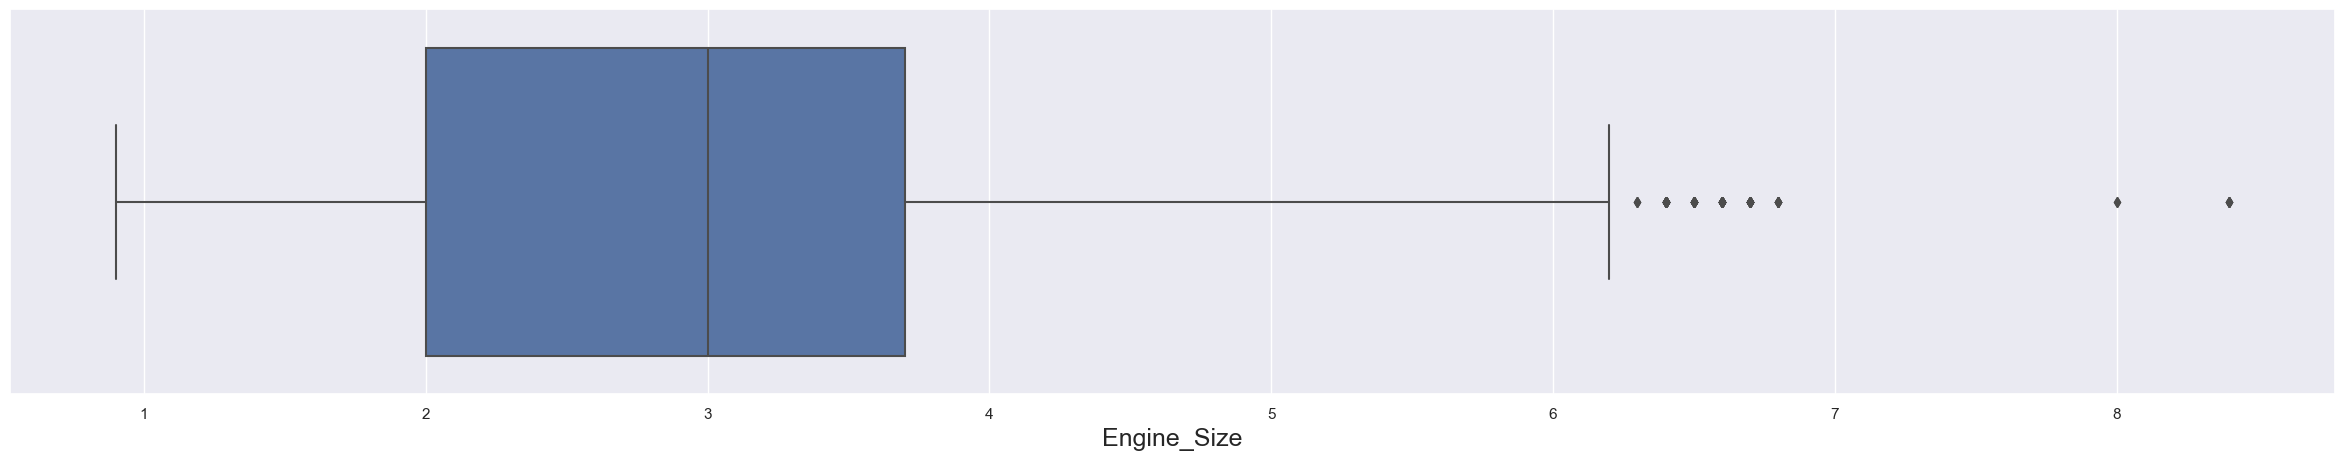

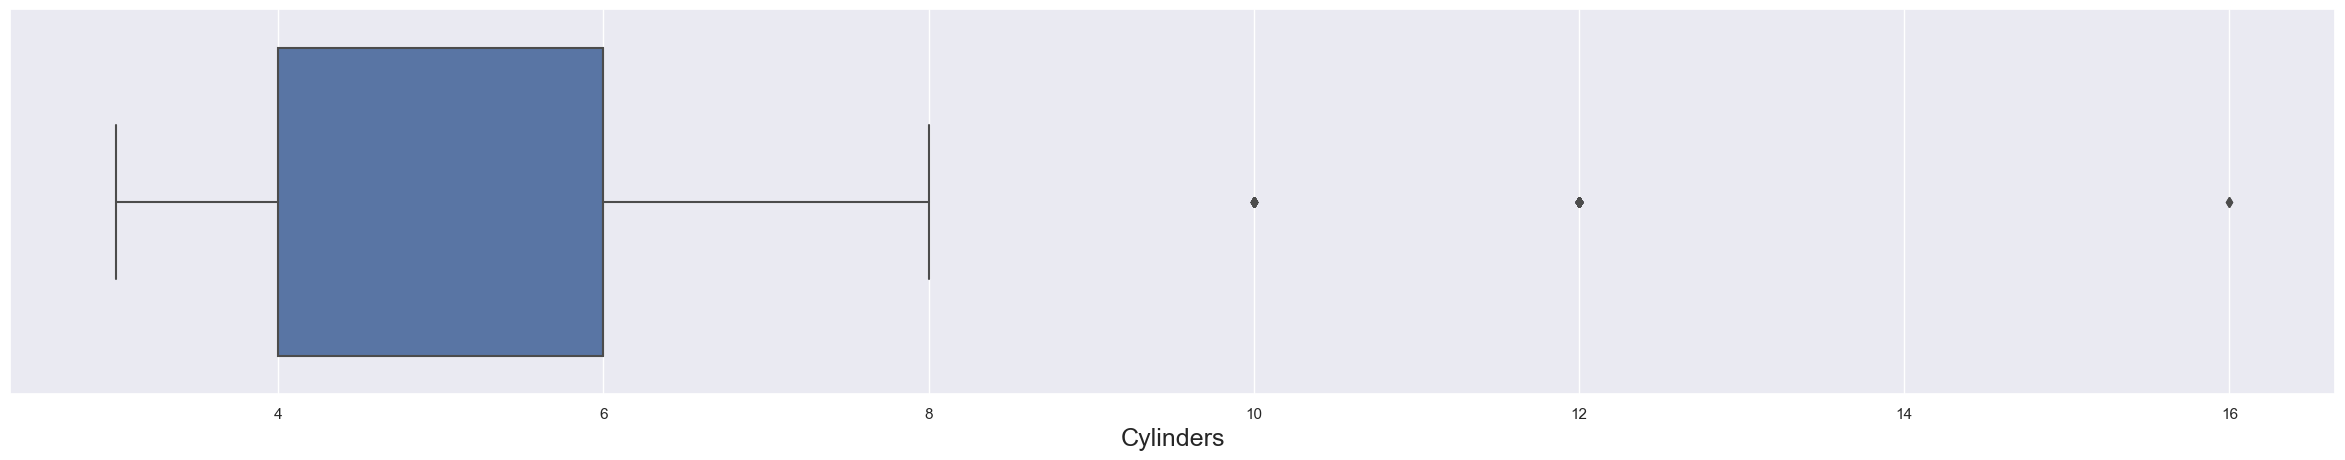

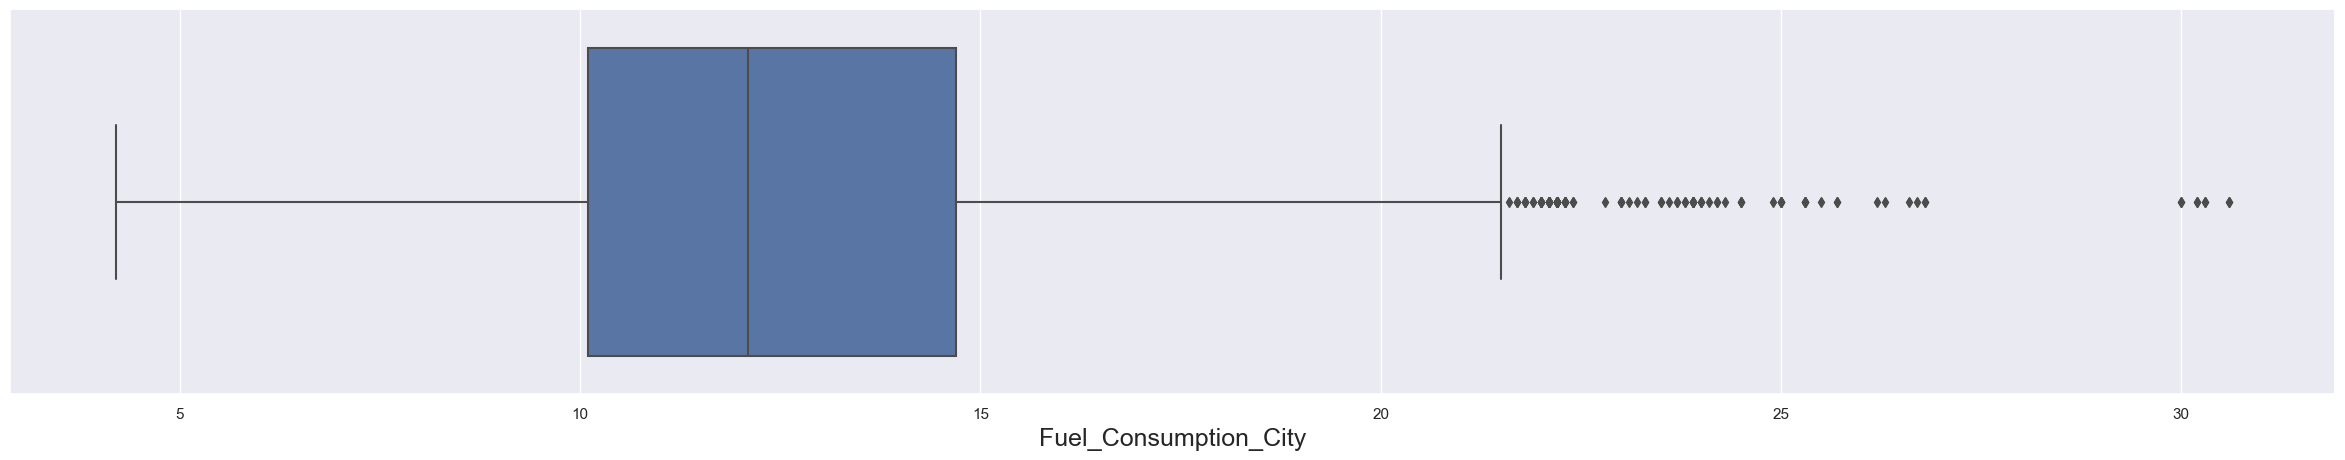

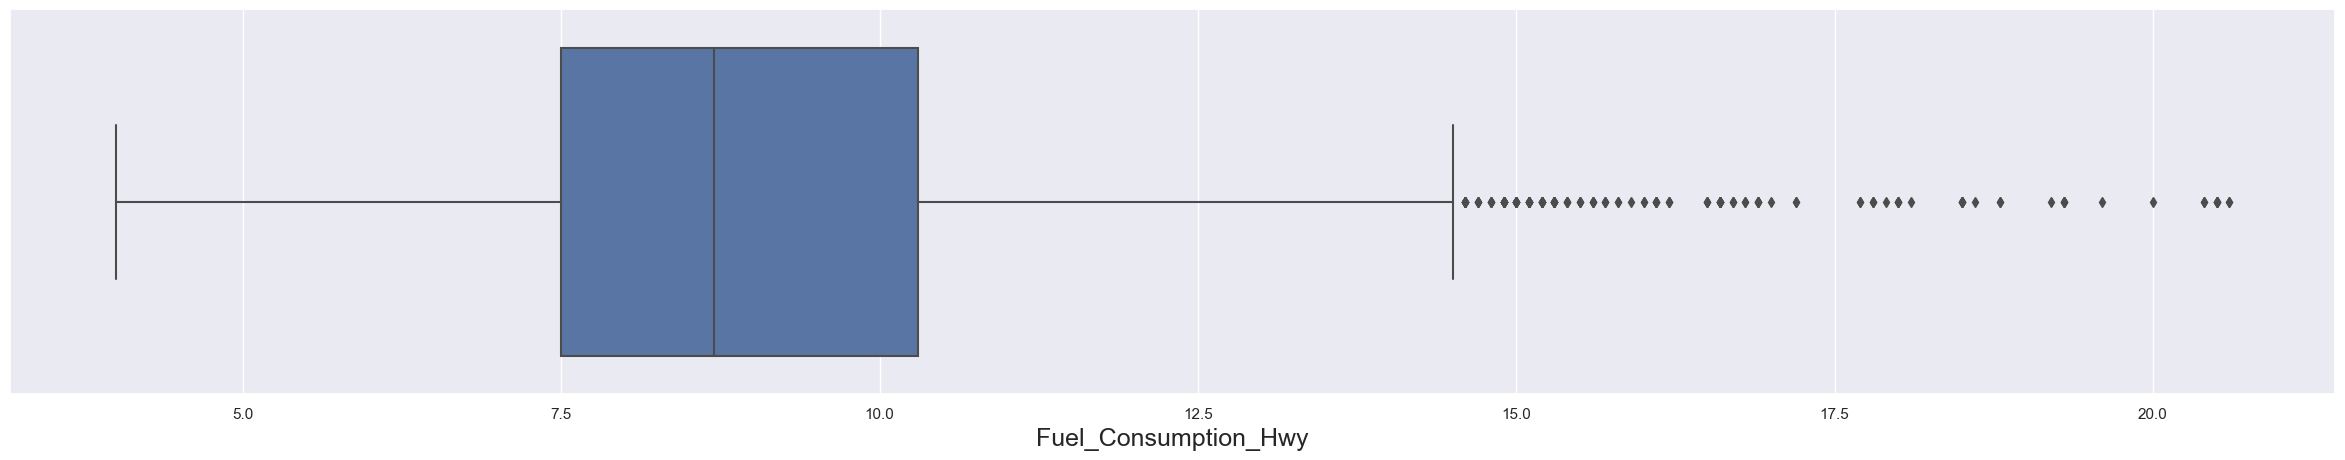

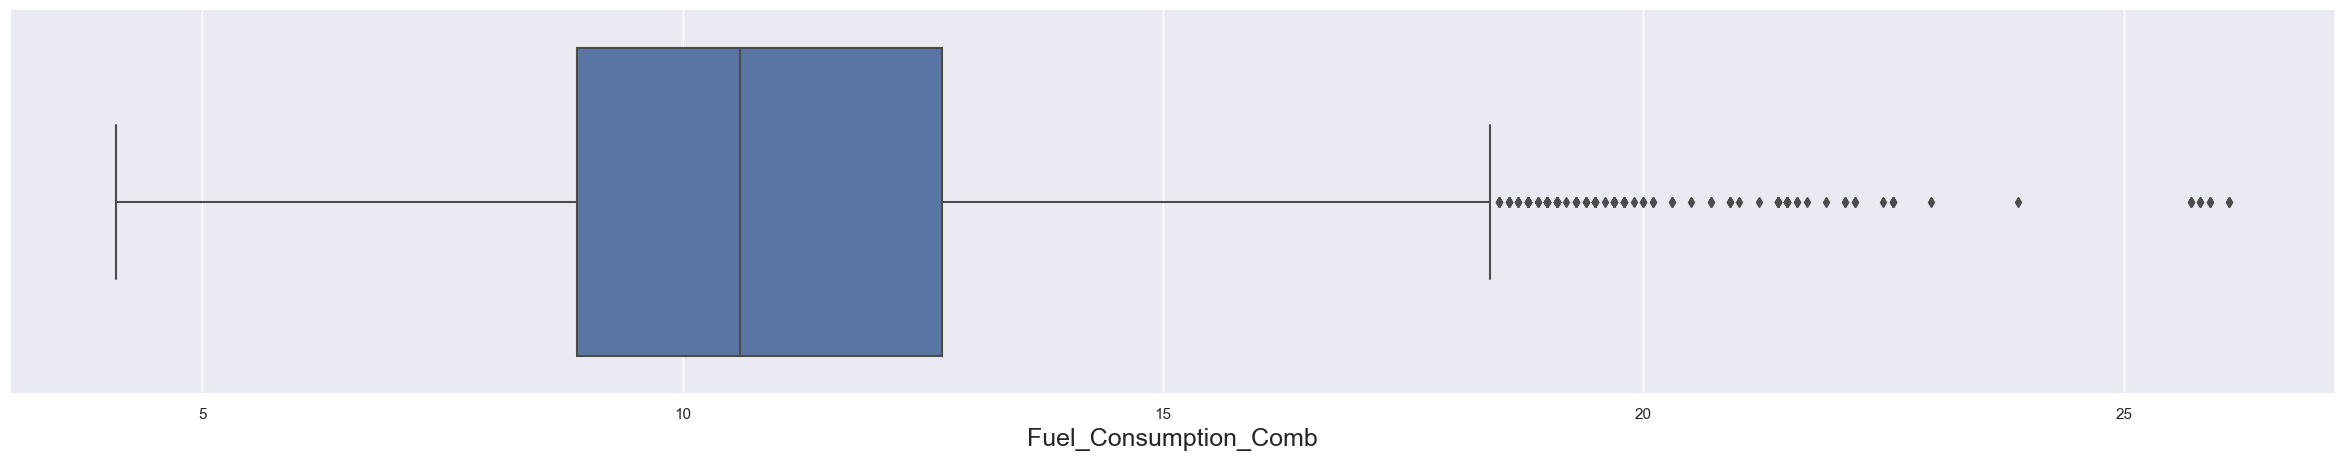

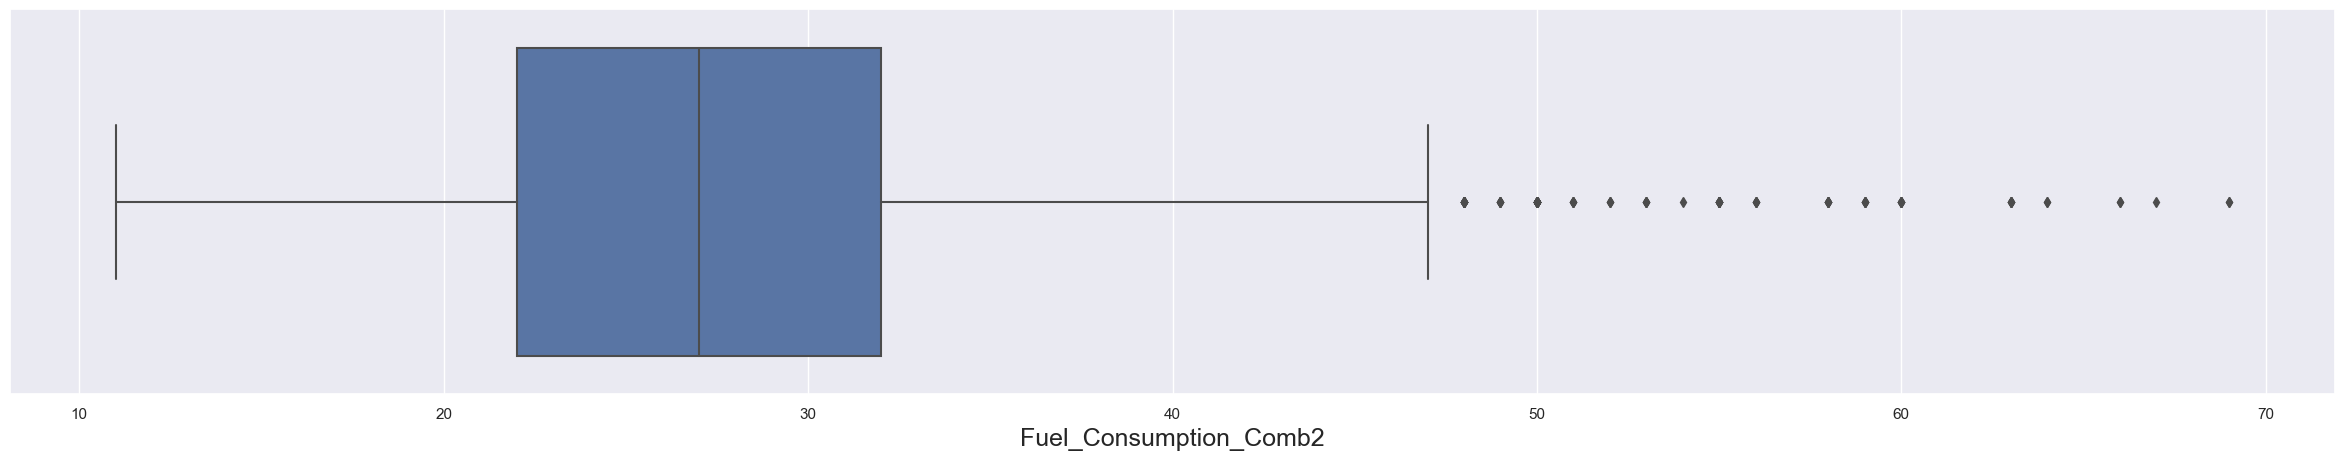

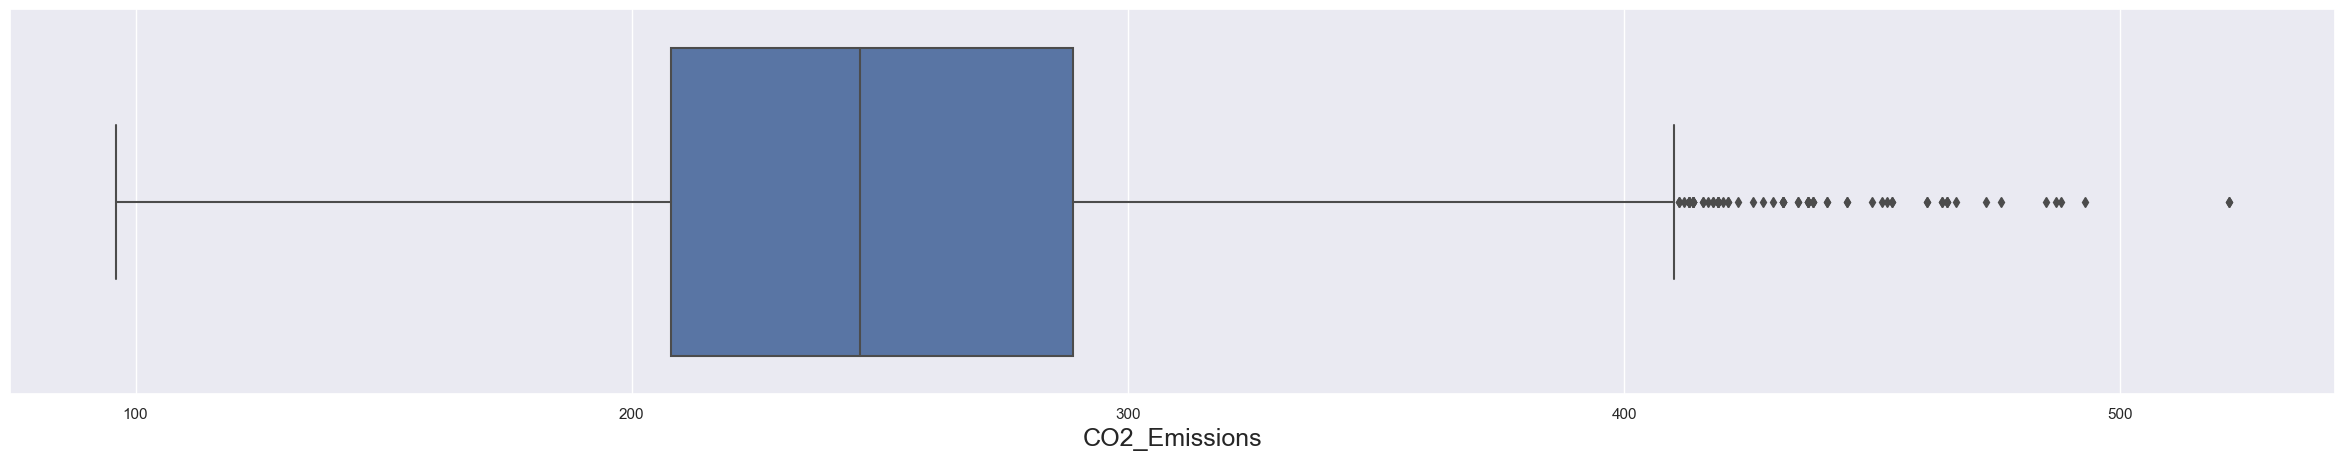

In [113]:
for column in enumerate(data_numerical):
    plt.figure(figsize=(30,5))
    sns.set_theme(style="darkgrid")
    sns.boxplot(x=column[1], data=  data_numerical)
    plt.xlabel(column[1],fontsize=18)
    plt.show()

According to our quantitative data visualizations, those numerical features are not normally distributed.

A small p-value (less than 0.05) suggests evidence against normality. 
Since, the numerical variables have not normal distributions, we can remove outliers using IQR method.

In [114]:
# Align the indices of data_numerical and outlier
data_numerical, outlier = data_numerical.align(outlier, axis=1, copy=False)


In [115]:
data = data[~((data_numerical < (Q1 - 1.5 * IQR)) |(data_numerical > (Q3 + 1.5 * IQR))).any(axis=1)]
data.reset_index(inplace=True, drop=True)


In [116]:
# check the shape of data after removing outliers:
data.shape

(5816, 12)

After removing outliers, our dataset contains just 5816 rows. Certainly, the descriptive caracteristics such as Mean and Mode will change slightly.

### 5.3. Correlation between all numerical features:

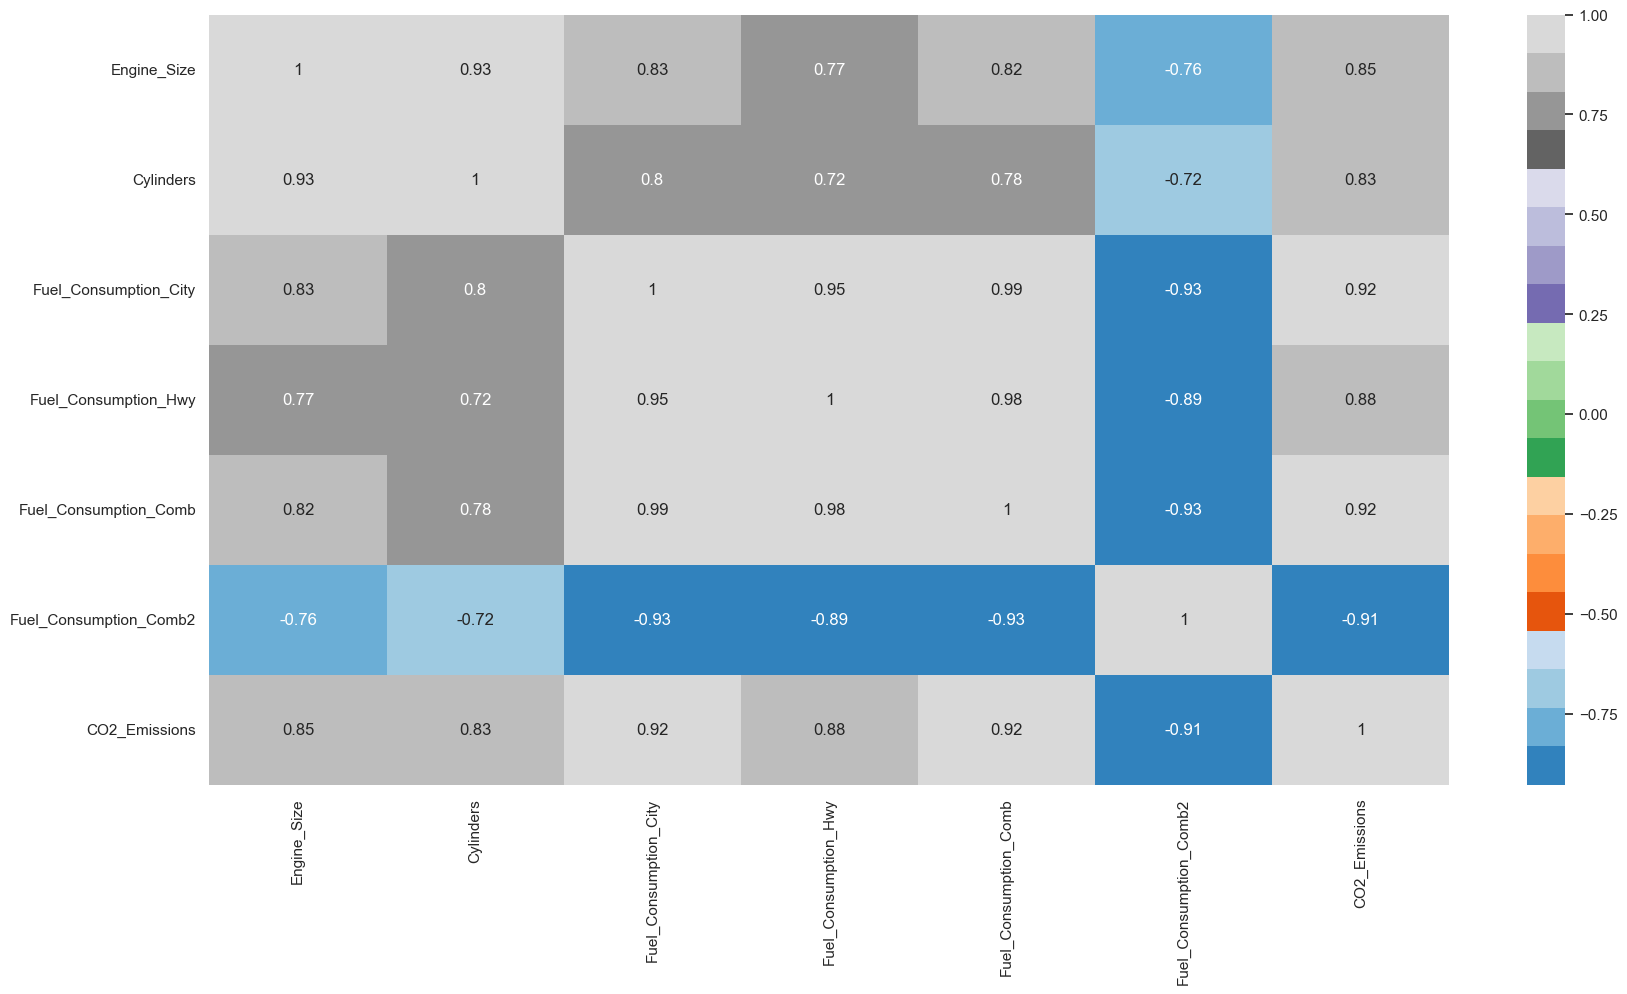

In [117]:
plt.figure(figsize=(20,10))

corr =  data_numerical.corr()

corr =data_numerical.corr(method='pearson')
sns.heatmap(corr, annot=True,cmap='tab20c')
plt.show()

There is a strong correlation between Fuel_Consumption_City, Fuel_Consumption_Hwy, Fuel_Consumption_Comb and Fuel_Consumption_Comb2. I will remove these columns Fuel_Consumption_City, Fuel_Consumption_Hwy, Fuel_Consumption_Comb.

In [118]:
data = data.drop(columns=['Fuel_Consumption_City', 'Fuel_Consumption_Hwy', 'Fuel_Consumption_Comb'])

## 6. Data Transformation

In [119]:
# Create a new feature Make_Type by combining various car companies(Make) on the basis of their functionality
# There are 42 unique Car Companies. We will divide these companies into Luxury, Sports, Premium and General cars
data['Make_Type'] = data['Make'].replace(['BUGATTI', 'PORSCHE', 'MASERATI', 'ASTON MARTIN', 'LAMBORGHINI', 'JAGUAR','SRT'], 'Sports')
data['Make_Type'] = data['Make_Type'].replace(['ALFA ROMEO', 'AUDI', 'BMW', 'BUICK', 'CADILLAC', 'CHRYSLER', 'DODGE', 'GMC','INFINITI', 'JEEP', 'LAND ROVER', 'LEXUS', 'MERCEDES-BENZ','MINI', 'SMART', 'VOLVO'],'Premium')
data['Make_Type'] = data['Make_Type'].replace(['ACURA', 'BENTLEY', 'LINCOLN', 'ROLLS-ROYCE',  'GENESIS'], 'Luxury')
data['Make_Type'] = data['Make_Type'].replace(['CHEVROLET', 'FIAT', 'FORD', 'KIA', 'HONDA', 'HYUNDAI', 'MAZDA', 'MITSUBISHI','NISSAN', 'RAM', 'SCION', 'SUBARU', 'TOYOTA','VOLKSWAGEN'],'General')

In [120]:
# Create a new feature Vehicle_Class_Type by combining various Vehicle_Class on the basis of their size
# There are 16 unique Vehicle Classes. We will divide them into Hatchback, Sedan, SUV and Truck.
data['Vehicle_Class_Type'] = data['Vehicle_Class'].replace(['COMPACT', 'MINICOMPACT', 'SUBCOMPACT'], 'Hatchback')
data['Vehicle_Class_Type'] = data['Vehicle_Class_Type'].replace(['MID-SIZE', 'TWO-SEATER', 'FULL-SIZE', 'STATION WAGON - SMALL', 'STATION WAGON - MID-SIZE'],'Sedan')
data['Vehicle_Class_Type'] = data['Vehicle_Class_Type'].replace(['SUV - SMALL', 'SUV - STANDARD', 'MINIVAN'],  'SUV')
data['Vehicle_Class_Type'] = data['Vehicle_Class_Type'].replace(['VAN - CARGO', 'VAN - PASSENGER', 'PICKUP TRUCK - STANDARD', 'SPECIAL PURPOSE VEHICLE', 'PICKUP TRUCK - SMALL'], 'Truck')

In [121]:
data.head()

,Make,Vehicle_Class,Engine_Size,Cylinders,Transmission,Fuel_Type,Fuel_Consumption_Comb2,CO2_Emissions,Transmission_Class,Make_Type,Vehicle_Class_Type
0,ACURA,COMPACT,2.0,4,AS5,Premium Gasoline,33,196,Automatic,Luxury,Hatchback
1,ACURA,COMPACT,2.4,4,M6,Premium Gasoline,29,221,Manual,Luxury,Hatchback
2,ACURA,SUV - SMALL,3.5,6,AS6,Premium Gasoline,25,255,Automatic,Luxury,SUV
3,ACURA,SUV - SMALL,3.5,6,AS6,Premium Gasoline,27,244,Automatic,Luxury,SUV
4,ACURA,MID-SIZE,3.5,6,AS6,Premium Gasoline,28,230,Automatic,Luxury,Sedan


In [122]:
# drop the columns 'Make','Vehicle_Class' and 'Transmission'.
data.drop(data[['Make','Vehicle_Class','Transmission']], inplace=True, axis=1)

data.head()

,Engine_Size,Cylinders,Fuel_Type,Fuel_Consumption_Comb2,CO2_Emissions,Transmission_Class,Make_Type,Vehicle_Class_Type
0,2.0,4,Premium Gasoline,33,196,Automatic,Luxury,Hatchback
1,2.4,4,Premium Gasoline,29,221,Manual,Luxury,Hatchback
2,3.5,6,Premium Gasoline,25,255,Automatic,Luxury,SUV
3,3.5,6,Premium Gasoline,27,244,Automatic,Luxury,SUV
4,3.5,6,Premium Gasoline,28,230,Automatic,Luxury,Sedan


In [123]:
# categorical encoding
data_dummies = pd.get_dummies(data = data[["Fuel_Type",  "Make_Type", "Transmission_Class", "Vehicle_Class_Type"]], drop_first = True)

data_numerical=data.select_dtypes(include=np.number)

data_comb = pd.concat([data_numerical, data_dummies], axis = 1)
data_comb = data_comb.astype(float)
data_comb.head()

,Engine_Size,Cylinders,Fuel_Consumption_Comb2,CO2_Emissions,Fuel_Type_Ethanol,Fuel_Type_Natural Gas,Fuel_Type_Premium Gasoline,Fuel_Type_Regular Gasoline,Make_Type_Luxury,Make_Type_Premium,Make_Type_Sports,Transmission_Class_Manual,Vehicle_Class_Type_SUV,Vehicle_Class_Type_Sedan,Vehicle_Class_Type_Truck
0,2.0,4.0,33.0,196.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.4,4.0,29.0,221.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,3.5,6.0,25.0,255.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,3.5,6.0,27.0,244.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,3.5,6.0,28.0,230.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


## 7. Multiple Linear Regression Model:

In [124]:
#define X and Y (target)
X = data_comb.drop(['CO2_Emissions'], axis=1)
y = data_comb['CO2_Emissions']

In [125]:
X = sm.add_constant(X)


In [126]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

In [127]:
MLR_model1 = sm.OLS(y_train, X_train).fit()
MLR_model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          CO2_Emissions   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     6584.
Date:                Tue, 29 Apr 2025   Prob (F-statistic):               0.00
Time:                        19:27:52   Log-Likelihood:                -15422.
No. Observations:                4071   AIC:                         3.087e+04
Df Residuals:                    4057   BIC:                         3.096e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                        436.4302      3.032    143.949      0.000     430.486     442.374
Engine_Size                    4.7281      0.439     10.763      0.000       3.867       5.589
Cylinders                      3.3592      0.351      9.582      0.000       2.672       4.046
Fuel_Consumption_Comb2        -6.9307      0.057   -121.473      0.000      -7.043      -6.819
Fuel_Type_Ethanol            -94.4051      1.508    -62.595      0.000     -97.362     -91.448
Fuel_Type_Natural Gas      -2.605e-13   2.03e-15   -128.052      0.000   -2.64e-13   -2.56e-13
Fuel_Type_Premium Gasoline   -29.1080      1.187    -24.529      0.000     -31.435     -26.781
Fuel_Type_Regular Gasoline   -30.0127      1.127    -26.640      0.000     -32.221     -27.804
Make_Type_Luxury              -0.4980      1.099     -0.453      0.650      -2.652       1.656
Make_Type_Premium             -3.9193      0.452     -8.670      0.000      -4.806      -3.033
Make_Type_Sports              -2.9229      0.771     -3.791      0.000      -4.435      -1.411
Transmission_Class_Manual      2.0273      0.477      4.247      0.000       1.091       2.963
Vehicle_Class_Type_SUV         3.5103      0.541      6.490      0.000       2.450       4.571
Vehicle_Class_Type_Sedan       0.4922      0.445      1.105      0.269      -0.381       1.365
Vehicle_Class_Type_Truck       7.0777      0.762      9.285      0.000       5.583       8.572
==============================================================================
Omnibus:                     1028.149   Durbin-Watson:                   2.048
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3765.016
Skew:                           1.223   Prob(JB):                         0.00
Kurtosis:                       7.027   Cond. No.                     2.85e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.2e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""


- About 95.5% of the variation in CO2 emissions can be explained by the independent variables in our model.
- The const coefficient (436.4302) represents the baseline CO2 emissions when all other predictors are zero.

- The coefficient for Engine_Size is approximately 4.7281. This means that for every one-unit increase in engine size, CO2 emissions increase by approximately 4.7281 units.

-  The p-value for Fuel_Consumption_Comb2 is 0.000, indicating that it is significant in CO2 emissions analysis.
- The Fuel_Consumption_Comb coefficient (6.9307) suggests that higher combined fuel consumption leads to increased CO2 emissions. for every one-unit increase in fuel consumption, CO2 emissions increase by approximately 6.9307 units.


- The Fuel_Type_Ethanol coefficient (-94.405) indicates that using ethanol as fuel significantly reduces CO2 emissions.

- Using Fuel_Type Regular Gasoline Gasoline and reduces also CO2 emissions (coeff= -30.0127).

- The Make_Type_Premium coefficient (-3.9193) suggests that premium car makes have slightly lower CO2 emissions.


- The Vehicle_Class_Type_Truck coefficient (7.0777) implies that trucks have higher CO2 emissions compared to other vehicle types.
